# **to do:**

- [define factors](https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf)
- put labels on graphs
- graph ladder score over all years for each country
-  making changes


# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Pre-Processing

In [2]:
# read csv files into data frames
df = pd.read_csv("data/world-happiness-report.csv")
df2021 = pd.read_csv("data/world-happiness-report-2021.csv")

In [3]:
# Add column for year on the data set for 2021
df2021['Year'] = 2021

In [4]:
list(df.columns)

['Country name',
 'year',
 'Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

In [5]:
list(df2021.columns)

['Country name',
 'Regional indicator',
 'Ladder score',
 'Standard error of ladder score',
 'upperwhisker',
 'lowerwhisker',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Ladder score in Dystopia',
 'Explained by: Log GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption',
 'Dystopia + residual',
 'Year']

In [6]:
# drop unnecessary columns
df2021 = df2021.drop(columns=['Standard error of ladder score','upperwhisker', 'lowerwhisker',
       'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'], axis=1)
df = df.drop(columns=['Positive affect','Negative affect'], axis=1)

In [7]:
# rename columns so that the data in the two files can be compared with by the same variable names
df2021 = df2021.rename(columns = {'Logged GDP per capita':'Log GDP per capita'} )
df = df.rename(columns= {'year':'Year', 'Life Ladder':'Ladder score', 'Healthy life expectancy at birth' : 'Healthy life expectancy'}) #we assume that healthy life expectancy at birth is the same as healthy life expectancy 

In [8]:
# add regional indicator to data set for 2008-2020
df_with_regions = pd.merge(df, df2021[['Country name','Regional indicator']], on = ['Country name'])
# df_with_regions
df_with_regions["Year"].unique() #does not include 2021

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2007, 2020, 2006, 2005])

In [9]:
# combine data sets to create one data frame for 2008-2021
df_all = pd.concat([df_with_regions, df2021], ignore_index=True).sort_values(by="Country name", ascending=True)
years_list = list(df_all["Year"].unique())
years_list

[2008,
 2019,
 2018,
 2017,
 2016,
 2015,
 2021,
 2013,
 2012,
 2011,
 2010,
 2009,
 2014,
 2020,
 2007,
 2006,
 2005]

In [10]:
# reorder columns
df_all = df_all[['Country name',
                 'Regional indicator',
                 'Year',
                 'Ladder score',
                 'Log GDP per capita',
                 'Healthy life expectancy',
                 'Social support',
                 'Freedom to make life choices',
                 'Generosity',
                 'Perceptions of corruption']]

In [11]:
# add column for time in terms of COVID
def covid_time(row):
    if row["Year"] < 2020:
        return "Pre-COVID"
    else:
        return "Post-COVID"

df_all["COVID time"] = df_all.apply(covid_time, axis=1)
df_all

,Country name,Regional indicator,Year,Ladder score,Log GDP per capita,Healthy life expectancy,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,COVID time
0,Afghanistan,South Asia,2008,3.724,7.370,50.800,0.451,0.718,0.168,0.882,Pre-COVID
11,Afghanistan,South Asia,2019,2.375,7.697,52.400,0.420,0.394,-0.108,0.924,Pre-COVID
10,Afghanistan,South Asia,2018,2.694,7.692,52.600,0.508,0.374,-0.094,0.928,Pre-COVID
9,Afghanistan,South Asia,2017,2.662,7.697,52.800,0.491,0.427,-0.121,0.954,Pre-COVID
8,Afghanistan,South Asia,2016,4.220,7.697,53.000,0.559,0.523,0.042,0.793,Pre-COVID
...,...,...,...,...,...,...,...,...,...,...,...
1873,Zimbabwe,Sub-Saharan Africa,2008,3.174,7.461,44.140,0.843,0.344,-0.090,0.964,Pre-COVID
1871,Zimbabwe,Sub-Saharan Africa,2006,3.826,7.711,41.580,0.822,0.431,-0.076,0.905,Pre-COVID
2033,Zimbabwe,Sub-Saharan Africa,2021,3.145,7.943,56.201,0.750,0.677,-0.047,0.821,Post-COVID
1877,Zimbabwe,Sub-Saharan Africa,2012,4.955,7.983,49.540,0.896,0.470,-0.103,0.859,Pre-COVID


In [12]:
list(df_all.columns)

['Country name',
 'Regional indicator',
 'Year',
 'Ladder score',
 'Log GDP per capita',
 'Healthy life expectancy',
 'Social support',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'COVID time']

# Average Ladder Score by Region

<AxesSubplot:ylabel='Regional indicator'>

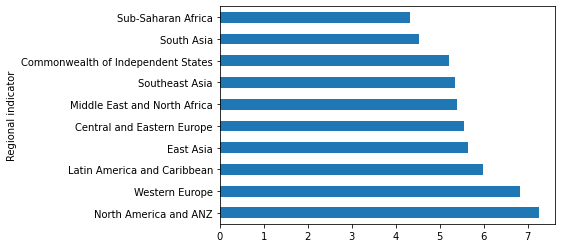

In [13]:
df_all.groupby('Regional indicator')['Ladder score'].mean().sort_values(ascending=False).plot.barh()

# Pre-COVID vs. Post-COVID

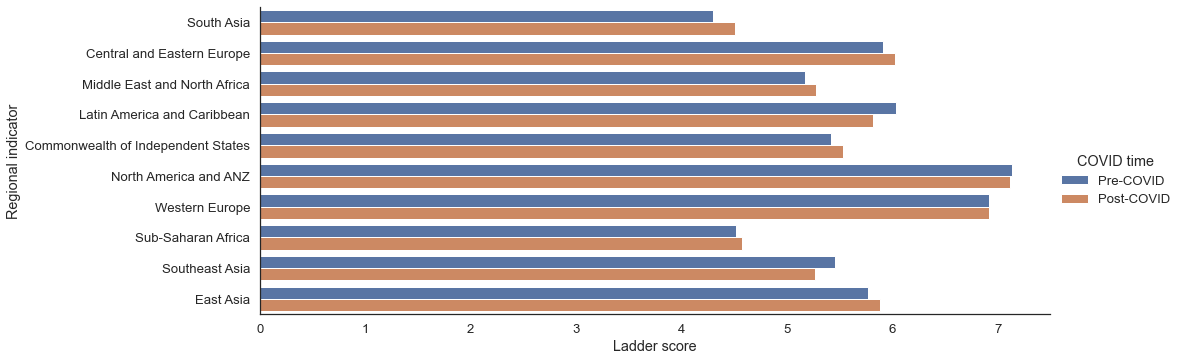

In [14]:
sns.set(style="white", font_scale=1.2)
covid_plot = sns.catplot(x="Ladder score", y="Regional indicator", hue="COVID time", data=df_all[df_all['Year'] >= 2018], kind="bar", ci=None, height=5, aspect=3)
# plt.savefig('figures/compare.png', dpi=300, bbox_inches='tight')

# Regional Indicator Line Graph

Text(22.54162133333331, 0.5, 'Ladder score')

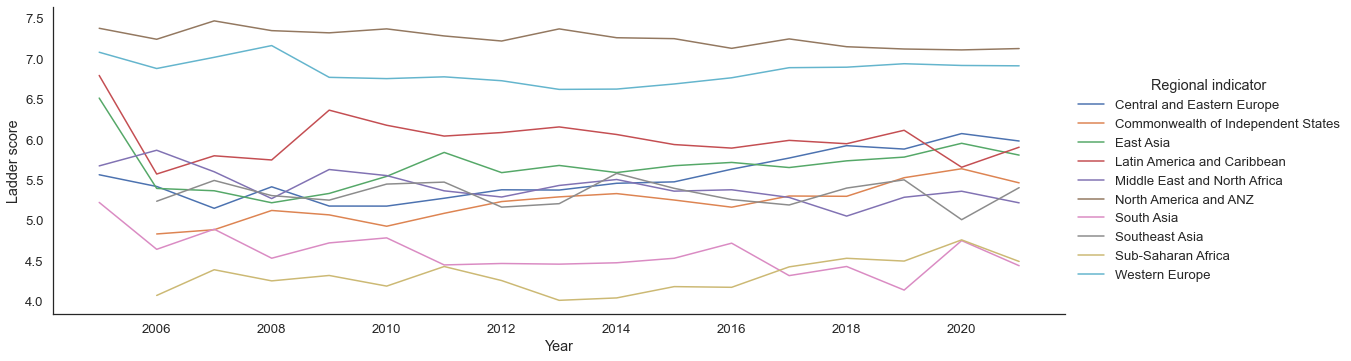

In [15]:
df_region = df_all.groupby(['Regional indicator', 'Year'])['Ladder score'].mean().to_frame().reset_index()
df_pivot_region = df_region.pivot("Year", "Regional indicator", "Ladder score")

sns.set(style="white", font_scale=1.2)
sns.relplot(data=df_pivot_region, kind="line", height=5, aspect=3, dashes=False)
plt.ylabel("Ladder score")

# Sort Countries by Average Ladder Score (All Years)

In [16]:
df_all_ladder = df_all.groupby('Country name')['Ladder score'].mean().sort_values(ascending=False)
df_all_ladder

Country name
Denmark        7.676625
Finland        7.614643
Switzerland    7.550364
Norway         7.501455
Netherlands    7.466133
                 ...   
Tanzania       3.692687
Rwanda         3.636000
Togo           3.610200
Burundi        3.586000
Afghanistan    3.512231
Name: Ladder score, Length: 149, dtype: float64

# Correlation Tables

## Social Support vs. Ladder Score

Text(0, 0.5, 'Ladder score')

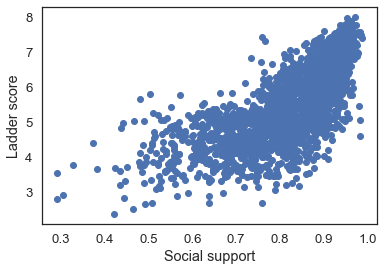

In [17]:
mydata = df_all[["Social support", "Ladder score"]].dropna(how="any")
vals = mydata.values
plt.scatter(vals[:, 0], vals[:, 1])
plt.xlabel("Social support")
plt.ylabel("Ladder score")

## Correlation Table

In [18]:
df_all.corr()

,Year,Ladder score,Log GDP per capita,Healthy life expectancy,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
Year,1.000000,0.038226,0.071433,0.166578,-0.004543,0.237245,-0.044313,-0.087272
Ladder score,0.038226,1.000000,0.789687,0.744895,0.710707,0.522491,0.181507,-0.440817
Log GDP per capita,0.071433,0.789687,1.000000,0.847429,0.704224,0.360170,-0.016865,-0.349512
Healthy life expectancy,0.166578,0.744895,0.847429,1.000000,0.615175,0.390519,0.009876,-0.336120
Social support,-0.004543,0.710707,0.704224,0.615175,1.000000,0.417165,0.059964,-0.228886
Freedom to make life choices,0.237245,0.522491,0.360170,0.390519,0.417165,1.000000,0.321830,-0.490298
Generosity,-0.044313,0.181507,-0.016865,0.009876,0.059964,0.321830,1.000000,-0.281714
Perceptions of corruption,-0.087272,-0.440817,-0.349512,-0.336120,-0.228886,-0.490298,-0.281714,1.000000


## Heat Map for Correlation

[Text(0.5, 0, 'Year'),
 Text(1.5, 0, 'Ladder score'),
 Text(2.5, 0, 'Log GDP per capita'),
 Text(3.5, 0, 'Healthy life expectancy'),
 Text(4.5, 0, 'Social support'),
 Text(5.5, 0, 'Freedom to make life choices'),
 Text(6.5, 0, 'Generosity'),
 Text(7.5, 0, 'Perceptions of corruption')]

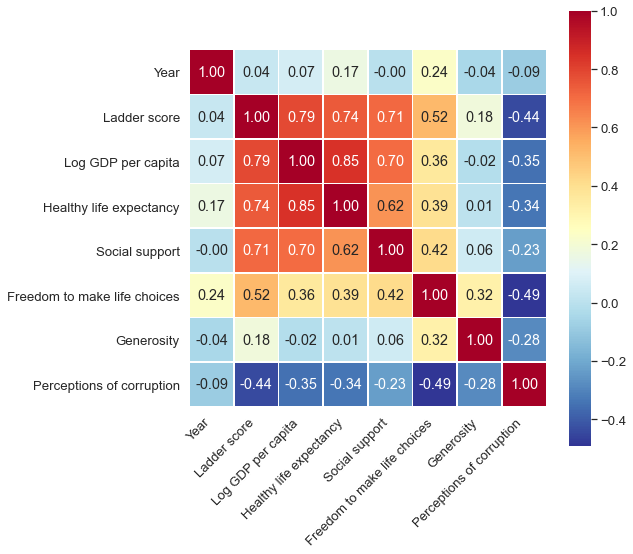

In [19]:
f,ax=plt.subplots(figsize=(8,8))
corrMatrix = df_all.corr()
hmap = sns.heatmap(corrMatrix, annot=True, linewidth=.5,fmt='.2f',ax=ax, square=True, cmap='RdYlBu_r')
hmap.set_xticklabels(hmap.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.savefig('figures/heatmap.png', dpi=300, bbox_inches='tight')

# Clustering

In [20]:
df_all.select_dtypes(include='number').columns

Index(['Year', 'Ladder score', 'Log GDP per capita', 'Healthy life expectancy',
       'Social support', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [21]:
from sklearn import mixture

start = df_all.groupby('Country name').mean()

X = start.select_dtypes(include='number')
X = X[['Ladder score', 'Log GDP per capita', 'Healthy life expectancy', 'Social support', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].copy()

model = mixture.GaussianMixture(n_components=3, covariance_type='full') 
model.fit(X)
y = model.predict(X)

to_plot = start.copy().reset_index()
to_plot.loc[:, 'cluster'] = pd.Series(y)

## View Each Cluster's Countries

In [22]:
cluster_sorted = to_plot.sort_values('Country name')

# Highest Cluster
highest = cluster_sorted.query("`Country name` == 'United States'")['cluster'].iloc[0]

# Middle Cluster
middle = cluster_sorted.query("`Country name` == 'Russia'")['cluster'].iloc[0]

# Lowest Cluster
lowest = cluster_sorted.query("`Country name` == 'South Africa'")['cluster'].iloc[0]

highest, middle, lowest

# Look at Countries in a Specific Cluster
which_cluster = highest # (highest / middle / lowest)
cluster_sorted.query('cluster == @which_cluster')['Country name'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany',
       'Hong Kong S.A.R. of China', 'Iceland', 'Ireland', 'Japan',
       'Luxembourg', 'Malta', 'Netherlands', 'New Zealand',
       'North Cyprus', 'Norway', 'Singapore', 'Sweden', 'Switzerland',
       'United Kingdom', 'United States'], dtype=object)

## Cluster Breakdown by Regional Indicator

In [23]:
regional = pd.merge(cluster_sorted, df2021[['Country name', 'Regional indicator']], on='Country name')
unstacked = regional.groupby('Regional indicator')['cluster'].value_counts().unstack()
unstacked.rename(columns={highest: 'highest', middle: 'middle', lowest: 'lowest'}, inplace=True)

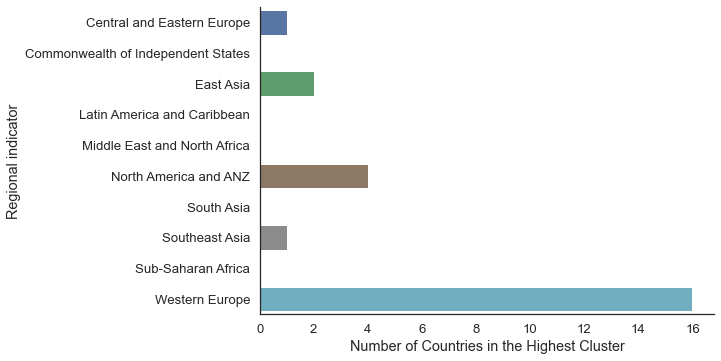

In [24]:
ax_h = sns.catplot(data = unstacked.reset_index(), x='highest', y='Regional indicator', kind='bar', aspect=2)
ax_h.set(xlabel='Number of Countries in the Highest Cluster')

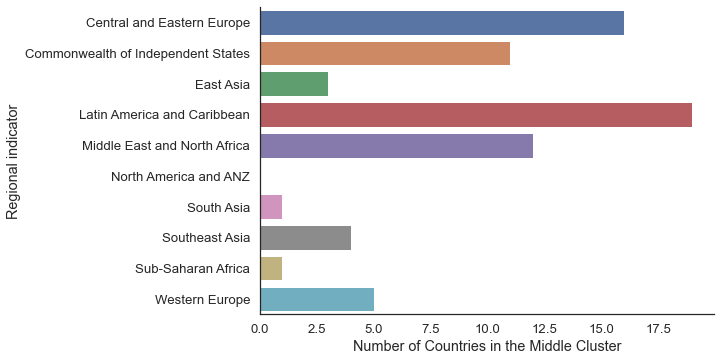

In [25]:
ax_m = sns.catplot(data = unstacked.reset_index(), x='middle', y='Regional indicator', kind='bar', aspect=2)
ax_m.set(xlabel='Number of Countries in the Middle Cluster')

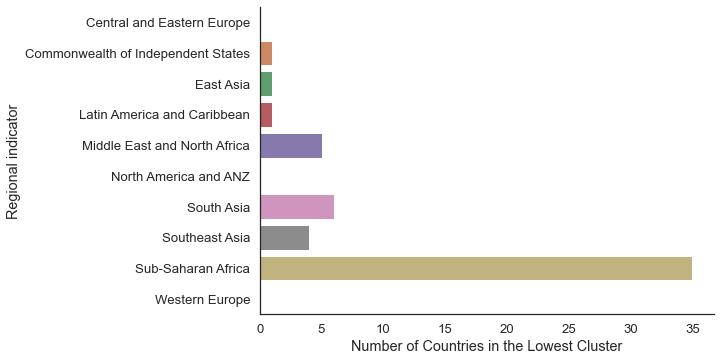

In [26]:
ax_l = sns.catplot(data = unstacked.reset_index(), x='lowest', y='Regional indicator', kind='bar', aspect=2)
ax_l.set(xlabel='Number of Countries in the Lowest Cluster')

## Pair Plot (Clustered)

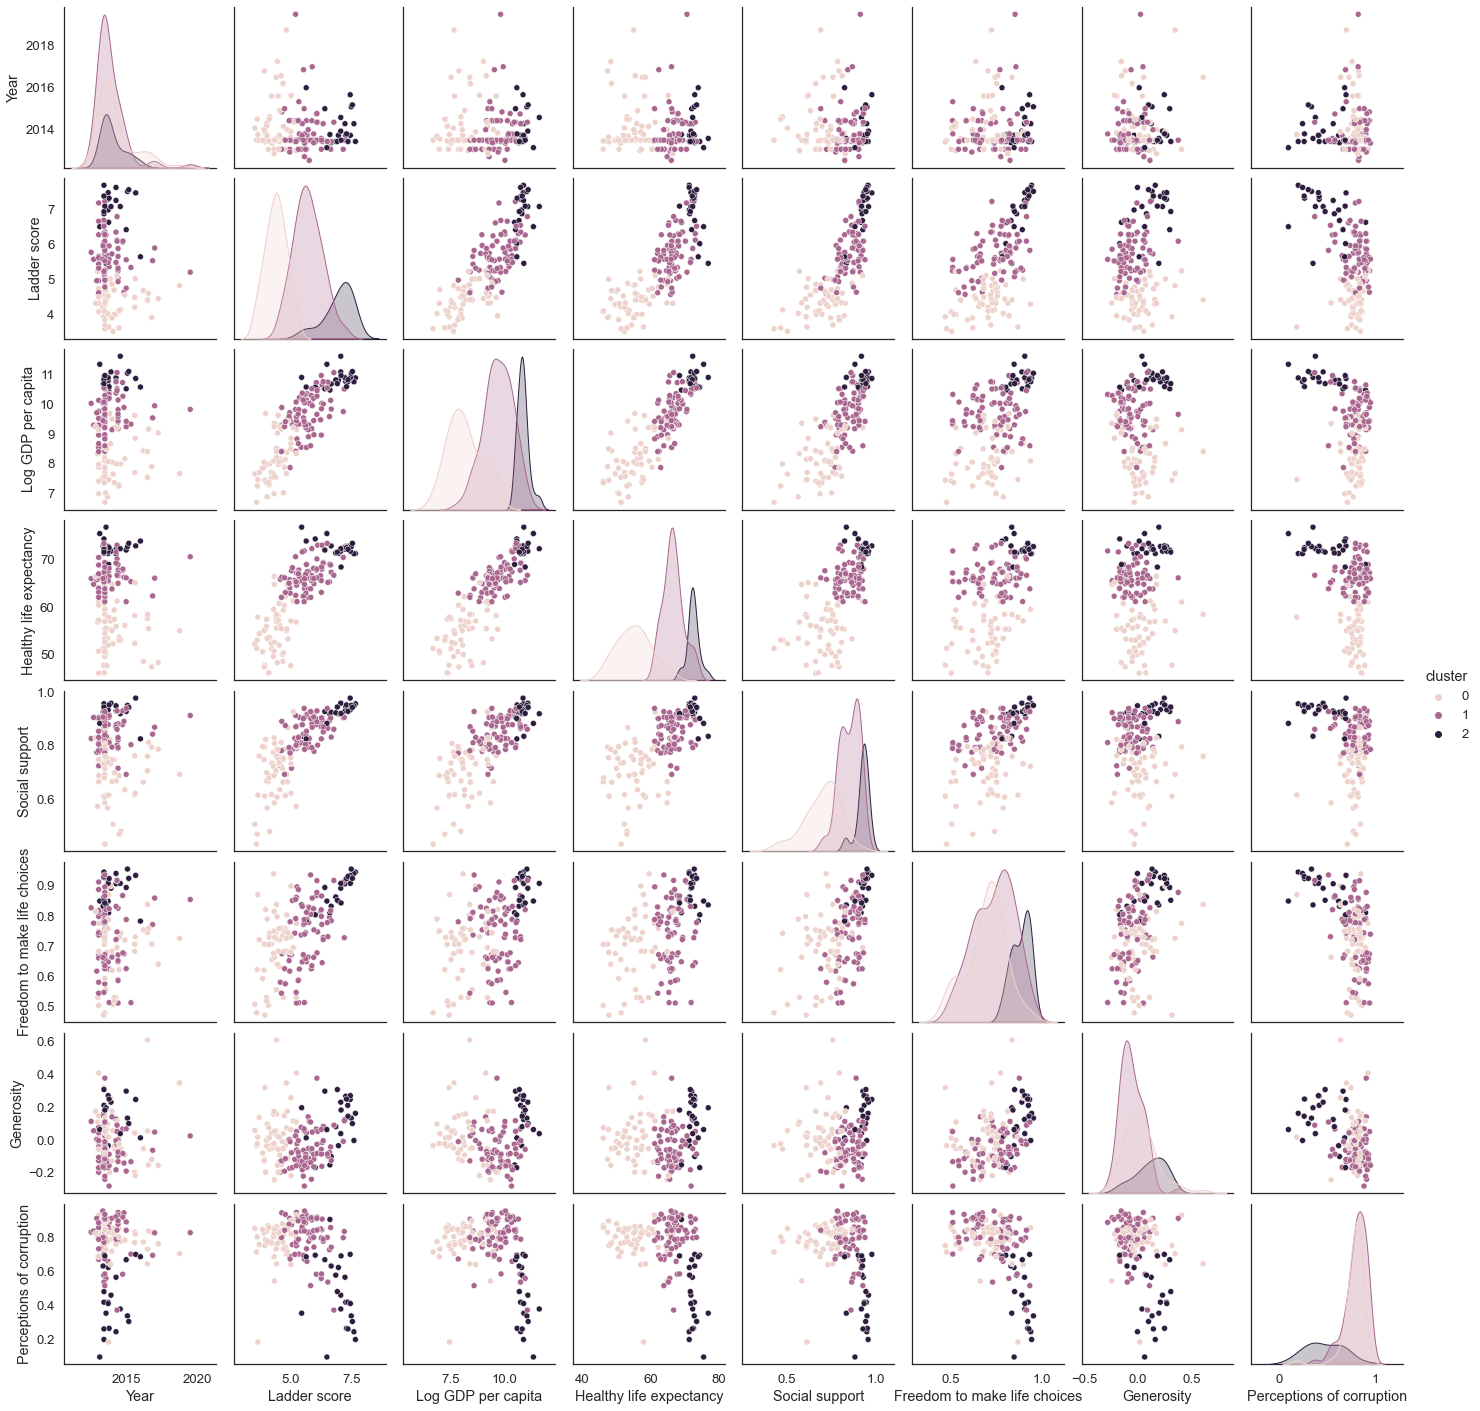

In [27]:
%matplotlib inline
sns.set(style="white", font_scale=1.2)
# sns.relplot(hue='cluster', x='Log GDP per capita', y='Healthy life expectancy', data=to_plot, kind="scatter", ci=None, height=5, aspect=3)
pair = sns.pairplot(data=to_plot, hue='cluster');

In [28]:
# Use to save pairplot
# pair.savefig('figures/pairplot_3clusters.png', dpi=300, bbox_inches='tight')

# Dimensionality Reduction

## 2 Dimensional

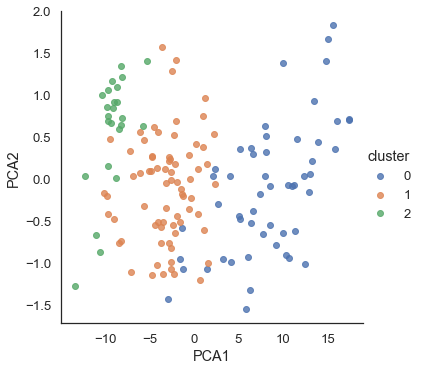

In [29]:
%matplotlib inline
from sklearn.decomposition import PCA
model = PCA(n_components=3)
model.fit(X)
X_2D = model.transform(X)

to_plot['PCA1'] = X_2D[:, 0]
to_plot['PCA2'] = X_2D[:, 1]
to_plot['PCA3'] = X_2D[:, 2]
sns.lmplot(x="PCA1", y="PCA2", hue='cluster', data=to_plot, fit_reg=False);

## 3 Dimensional

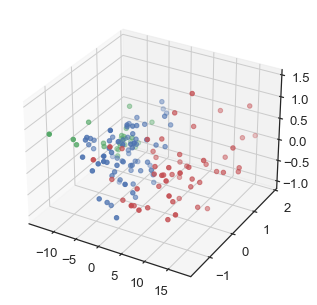

In [30]:
# 3D Dimensionality Reduction
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(to_plot[to_plot['cluster'] == 0]['PCA1'], to_plot[to_plot['cluster'] == 0]['PCA2'], to_plot[to_plot['cluster'] == 0]['PCA3'], c='r')
ax.scatter(to_plot[to_plot['cluster'] == 1]['PCA1'], to_plot[to_plot['cluster'] == 1]['PCA2'], to_plot[to_plot['cluster'] == 1]['PCA3'], c='b')
ax.scatter(to_plot[to_plot['cluster'] == 2]['PCA1'], to_plot[to_plot['cluster'] == 2]['PCA2'], to_plot[to_plot['cluster'] == 2]['PCA3'], c='g')
plt.show()

# Pandas Profiling

In [35]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# conda update -n base -c defaults conda
# !conda install -c conda-forge pandas-profiling -y

In [36]:
# from pandas_profiling import ProfileReport

In [37]:
# my_report = ProfileReport(df_all, title="My Report (July 10)", html={'style':{'full width':True}})
# my_report.to_notebook_iframe()
# my_report.to_file(output_file="My Report (July 10).html")